In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.ndimage import imread
import matplotlib.pyplot as plt

### On définit une fonction pour construire une ondelette de Ricker. La fonction prend la fréquence dominante en entrée et retourne l'amplitude en fonction du temps:

In [3]:
def ricker(f, length=0.20, dt=0.001):
    t = np.linspace(-length/2, (length-dt)/2, length/dt)
    y = (1.-2.*(np.pi**2)*(f**2)*(t**2))*np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

### Donc, si on veut obtenir une ondelette de fréquence dominante de 40 Hz:

In [4]:
f = 40 #Hz
t, amp = ricker(f)

### On peut montrer l'ondelette sur une figure:

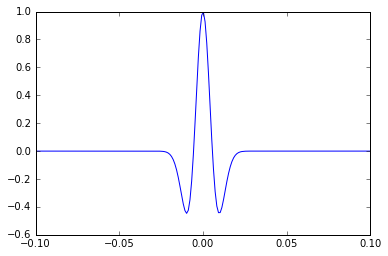

In [5]:
plt.plot(t,amp)

### En utilisant quelques trucs de visualisation inspirés de AgileGeosicence (http://www.agilegeoscience.com), on peut améliorer pas mal cette image.


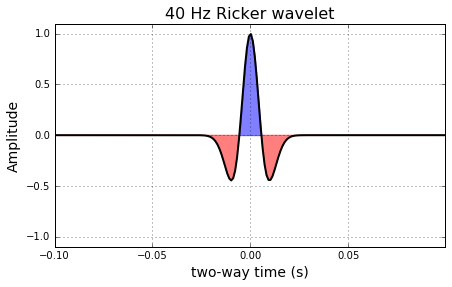

In [6]:
plt.figure(figsize=(7,4))
plt.plot( t, amp, lw=2, color='black')
plt.fill_between(t, amp, 0,  amp > 0.0, interpolate=True, color='blue', alpha = 0.5)
plt.fill_between(t, amp, 0, amp < 0.0, interpolate=True, color='red', alpha = 0.5)

# Axes configuration and settings (optional)
plt.title('%d Hz Ricker wavelet' %f, fontsize = 16 )
plt.xlabel( 'two-way time (s)', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.ylim((-1.1,1.1))
plt.xlim((min(t),max(t)))
plt.grid()
plt.show()

### Maintenant, pour une fois, je vais utiliser ma propre image au lieu de celle des autres...

In [7]:
im_blou=imread('pics/Blou_pic.jpg',flatten=True)

### J'utilise l'option 'flatten=True' pour convertir l'image RGB en nuances de gris. Pour obtenir tout de même un bon rendu de l'image, j'utilise les nouvelles barres de couleur 'viridis' et 'inferno' de matplotlib

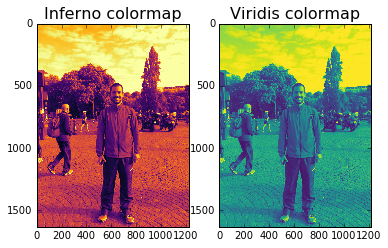

In [8]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.imshow(im_blou.T,cmap='inferno')
ax2.imshow(im_blou.T,cmap='viridis')
ax1.set_title('Inferno colormap',fontsize=16)
ax2.set_title('Viridis colormap',fontsize=16)

### J'y vais ensuite de convolution 1D de mon image avec l'ondelette de Ricker préalablement définie. Je teste la convolution colonne par colonne et ligne par ligne. L'option 'mode = same' force le résultat à avoir la même taille que l'image en entrée.

In [9]:
Blou_convo= np.array([np.convolve(im_blou[:,col],amp,mode='same') for col in range(len(im_blou[0,:]))])
Blou_convo_2= np.array([np.convolve(im_blou[row,:],amp,mode='same') for row in range(len(im_blou[:,0]))])

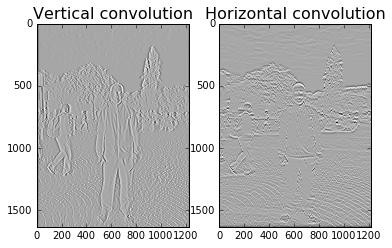

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.imshow(Blou_convo,cmap='Greys')
ax2.imshow(Blou_convo_2.T,cmap='Greys')

ax1.set_title('Vertical convolution',fontsize=16)
ax2.set_title('Horizontal convolution',fontsize=16)